In [2]:
# Initialize the workspace
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Always make it pretty.
plt.style.use('ggplot')
sns.set_style(style="whitegrid")
%matplotlib inline

In [3]:
# Read in dataframes
df = pd.read_csv('data/csv/df.csv')
df_decades = pd.read_csv('data/csv/df_decades.csv')

In [4]:
# Copy/pasted list of rappers for personal convenience
rapper_list = (['Run-DMC', 'KRS-One', 'LL Cool J', 'Beastie Boys',
                'Public Enemy', 'Eazy-E', 'Slick Rick', 'Big Daddy Kane',
                'Ice-T', 'Salt-N-Pepa', 'A Tribe Called Quest', 'Heavy D',
                'Ice Cube', 'Too $hort', 'De La Soul', 'MC Hammer',
                'Redman', 'Snoop Dogg', 'Outkast', 'Jay-Z',
                'Scarface', 'Nas', '2Pac', 'The Notorious B.I.G.',
                'Wu-Tang Clan', 'DMX', 'Foxy Brown', 'Mobb Deep',
                'Bone Thugs-N-Harmony', 'Busta Rhymes', 'MC Lyte', 'Mos Def',
                '50 Cent', 'Missy Elliott', 'Common', 'E-40',
                'Eminem', 'Lil Wayne', 'Ludacris', 'Kanye West',
                'T.I.', 'Nelly', 'The Game', 'J. Cole',
                'Twista', 'Jadakiss', 'Jeezy', 'Talib Kweli',
                'Drake', 'Gucci Mane', 'Eve', 'Rick Ross',
                "Cam'ron", 'Meek Mill', 'Lil Kim', 'Ja Rule',
                'Remy Ma', 'Bow Wow', 'Chingy', 'Soulja Boy',
                'Young Dro', 'Future', 'Travis Scott', 'Big Sean',
                'ASAP Rocky', 'Tyler, the Creator', 'Lil Uzi Vert', 'JID',
                'Denzy Curry', 'Joey Bada$$', 'Chance the Rapper', 'Kid Cudi',
                'Nipsey Hussle', 'Clipse', 'Young Thug', '21 Savage',
                'Schoolboy Q', 'ASAP Ferg', '2 Chainz', 'Nicki Minaj',
                'Migos', 'YG', 'Danny Brown', 'Freddie Gibbs',
                'Jay Rock', 'Lupe Fiasco', 'Vince Staples', 'Wale',
                'Chief Keef', 'Earl Sweatshirt', 'Rapsody', 'Mac Miller',
                'Trina', 'Cardi B', 'Action Bronson', 'The Roots',
                'Maxo Kream', 'Brockhampton', 'Smino', 'Big KRIT'])

In [5]:
def plot_word_counts(df, artist):
    '''
    Given an artist, this function plots histograms associated with that
    artist's raw word counts in lyrics.

    Parameters:
    artist (string): the artist of interest
    df (dataframe): dataframe
    '''
    fig, axs = plt.subplots(2, 1, sharey=True, figsize=(8,12))
    counts = []
    unique_counts = []
    table = str.maketrans("","", string.punctuation.replace("'", ""))
    
    for song in df[df['Artist'] == artist]['Lyrics'].values:
        counts.append(len(song.lower().translate(table).split()))
        unique_counts.append(len(set(song.lower().translate(table).split())))
    
    sns.distplot(counts, ax=axs[0], kde=False,
                 color='mediumslateblue', bins=20)
    axs[0].set_title(f'Total Word Counts in Songs by {artist}')
    axs[0].set_xlabel('Total Words')
    axs[0].set_ylabel('Counts')
    
    sns.distplot(unique_counts, ax=axs[1], kde=False,
                 color='darkslateblue', bins=20)
    axs[1].set_title(f'Unique Word Counts in Songs by {artist}')
    axs[1].set_xlabel('Unique Words')
    axs[1].set_ylabel('Counts')
    plt.show()
    plt.savefig(f'img/word_counts_{artist}.png')

In [51]:
def plot_word_counts_2(df, artist1, artist2):
    '''
    Given a dataframe and two artists, this function plots histograms 
    associated with those artist's raw word counts in lyrics.

    Parameters:
    artist (string): the artist of interest
    df (dataframe): dataframe
    '''
    fig, axs = plt.subplots(2, 1, sharey=False, figsize=(8,12))
    table = str.maketrans("","", string.punctuation.replace("'", ""))

    counts = []
    unique_counts = []
    for song in df[df['Artist'] == artist1]['Lyrics'].values:
        counts.append(len(song.lower().translate(table).split()))
        unique_counts.append(len(set(song.lower().translate(table).split())))
        
    counts2 = []
    unique_counts2 = []
    for song in df[df['Artist'] == artist2]['Lyrics'].values:
        counts2.append(len(song.lower().translate(table).split()))
        unique_counts2.append(len(set(song.lower().translate(table).split())))
    
    sns.distplot(counts, ax=axs[0], kde=False, norm_hist=True,
                 color='turquoise', bins=20, label=f'{artist1}')
    sns.distplot(counts2, ax=axs[0], kde=False, norm_hist=True,
                 color='orange', bins=20, label=f'{artist2}')
    axs[0].set_title(f'Total Word Count Distribution: {artist1} vs {artist2}')
    axs[0].set_xlabel('Total Words')
    axs[0].set_ylabel('Counts')
    axs[0].legend()
    
    sns.distplot(unique_counts, ax=axs[1], kde=False, norm_hist=True,
                 color='turquoise', bins=20, label=f'{artist1}')
    sns.distplot(unique_counts2, ax=axs[1], kde=False, norm_hist=True,
                 color='orange', bins=20, label=f'{artist2}')
    axs[1].set_title(f'Unique Word Count Distribution:  {artist1} vs {artist2}')
    axs[1].set_xlabel('Unique Words')
    axs[1].set_ylabel('Counts')
    axs[1].legend()
    
    save1 = ''.join(x for x in artist1 if x.isalpha())
    save2 = ''.join(x for x in artist2 if x.isalpha())
    fig.savefig(f'img/word_counts_{save1}_{save2}.png')

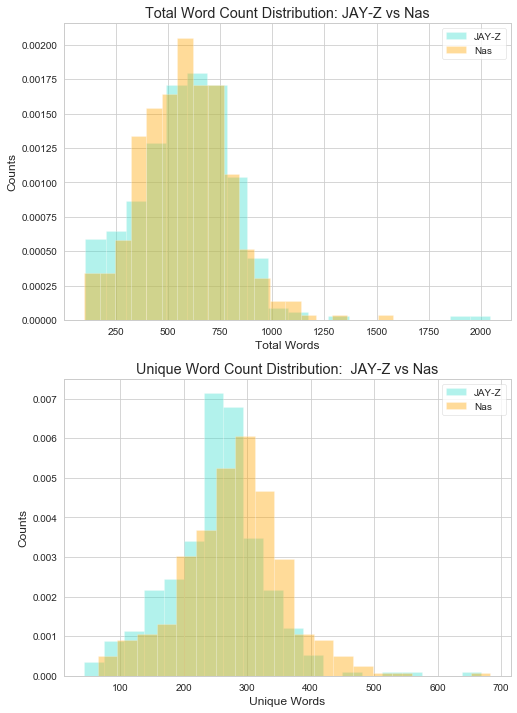

In [54]:
plot_word_counts_2(df, 'JAY-Z', 'Nas')

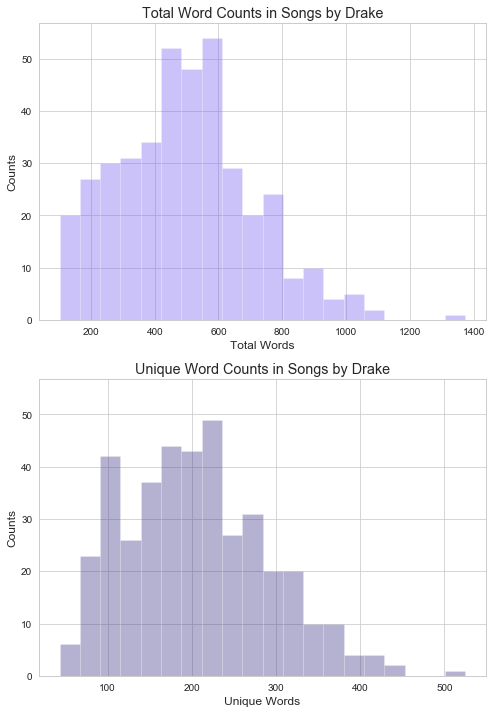

In [20]:
plot_word_counts(df, 'Drake')

In [6]:
bankaccount = df['Lyrics'].values[0]
bankaccount

"Ooh, ooh, ooh, ow, ow, ow\nWow, wow, ow, ah, ow, ah, ah, ah\n\nI buy a new car for the bitch (for real)\nI tear down the mall with the bitch (for real)\nYou can't even talk to the bitch (no)\nShe fucking with bosses and shit (on God)\nI pull up in 'Rari's and shit (skrrr)\nWith choppers and Harley's and shit (for real)\nI be Gucci'd down (Gucci)\nYou wearing Lacoste and shit (bitch)\nYeah, Moncler, yuh, fur came off a bear, yuh (yeah)\nTriple homicide, put me in a chair, yuh (in jail)\nTriple cross the plug, we do not play fair, yuh (on God)\nGot 'em tennis chains on and they real blingy (bling)\nDraco make you do the chicken head like Chingy (Chingy)\nWalk in Neiman Marcus and I spend a light fifty (fifty)\nPlease proceed with caution, shooters, they be right with me (21)\nBad bitch, cute face and some nice titties\n$7500 on a Saint Laurent jacket (yeah)\nBitch, be careful when you dumpin' your ashes (bitch)\nI ain't no sucker, I ain't cuffin' no action (nah)\nThe skreets raised me, 

In [104]:
def spacy_tokenizer(song):
    '''
    Given a song, this function tokenizes it, lemmatizes it, and strips it

    Parameters:
    song (string): dataframe
    '''
    nlp.max_length = 3000000
    doc = nlp(song)
    tokens = ([word.lemma_.lower().strip() for word in doc
               if word.lemma_ != "-PRON-"
               and word.pos_ not in {"PUNCT", "SPACE", "SYM"}
               and word.lemma_ not in stopwords]) 
    return tokens

In [25]:
# Loaded spaCy's English package
nlp = spacy.load("en_core_web_sm")

In [102]:
def plot_common_words(df, artist):
    '''
    Given an artist, this function plots their 10 most used words, barring
    stop words.

    Parameters:
    artist (string): the artist of interest
    df (dataframe): dataframe
    '''
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    rapwords = {'oh', 'aye', 'yeah', 'yuh', 'huh', 'ha', 'hah', 'ow',
                'ah', 'um', 'umm', '’', 'na', 'nah', 'w/', 'yo', 'w',
                'ooh', 'oooh', 'oohwee', 'oohweee', 'oo', 'ooo', 'oooo',
                'fuck', 'shit', 'bitch', 'damn', 'hell', 'nigga', 'skrt',
                'skrrt', 'skrrrt', "'s", 'wow', 'skrrr', 'fucking', "y'",
                'ya', "'", 'ayy', 'ass', 'niggas', 'uh', 'like'}
    stopwords = stop_words|rapwords

    words = []
    counts = []
    lyrics = " ".join(df[df['Artist'] == artist]['Lyrics'].values)
    cleanlyrics = spacy_tokenizer(lyrics)
    mostcommon = Counter(cleanlyrics).most_common(10)
    for word, count in mostcommon:
        words.append(word.upper())
        counts.append(count)
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(x = counts, y = words, palette = 'Blues_r')
    ax.set_title(f'Most Frequently Used Words by {artist}', size=18)
    ax.set_xlabel('Counts', size=14)
    save = ''.join(x for x in artist if x.isalpha())

    fig.savefig(f'img/most_common_{save}.png')

In [106]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
rapwords = {'oh', 'aye', 'yeah', 'yuh', 'huh', 'ha', 'hah', 'ow',
            'ah', 'um', 'umm', '’', 'na', 'nah', 'w/', 'yo', 'w',
            'ooh', 'oooh', 'oohwee', 'oohweee', 'oo', 'ooo', 'oooo',
            'fuck', 'shit', 'bitch', 'damn', 'hell', 'nigga', 'skrt',
            'skrrt', 'skrrrt', "'s", 'wow', 'skrrr', 'fucking', "y'",
            'ya', "'", 'ayy', 'ass', 'niggas', 'uh', 'like'}
stopwords = stop_words|rapwords

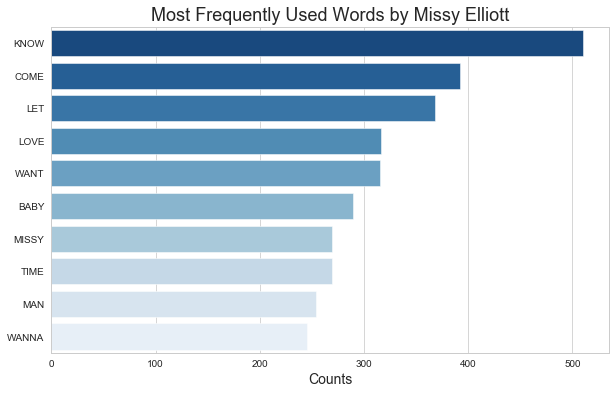

In [108]:
plot_common_words(df, 'Missy Elliott')

In [86]:
# An unfinished function with the goal of plotting an artist's most mentioned
# entities
def plot_entities(df, artist):
    '''
    Given an artist, this function plots their 10 most used words, barring
    stop words.

    Parameters:
    artist (string): the artist of interest
    df (dataframe): dataframe
    '''

    ent_dict = dict()
    lyrics = " ".join(df[df['Artist'] == artist]['Lyrics'].values)
    doc = nlp(lyrics)
    for ent in doc.ents:
        if ent.text.strip().lower() not in ent_dict.keys():
            ent_dict[ent.text.strip().lower()] = 1
        else:
            ent_dict[ent.text.strip().lower()] += 1
    sorted_ents = sorted(ent_dict.items(), key=lambda x: x[1],
                              reverse = True)
    ents = []
    vals = []
    for ent, val in sorted_ents:
        ents.append(ent)
        vals.append(vals)
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(x = ents[:10], y = vals[:10],
                palette = 'PuBu_r')
    ax.set_title(f'Most Named Entities by {artist}', size=18)
    ax.set_xlabel('Entity', size=14)
    ax.set_ylabel('Counts', size=14)
    plt.savefig(f'img/entities_{artist.lower()}.png')

In [55]:
# Created a plot to look at the distributions of total word counts of all 
# songs in our dataframe
table = str.maketrans("","", string.punctuation.replace("'", ""))
counts = []
unique_counts = []
for song in df['Lyrics'].values:
    counts.append(len(song.lower().translate(table).split()))
    unique_counts.append(len(set(song.lower().translate(table).split())))

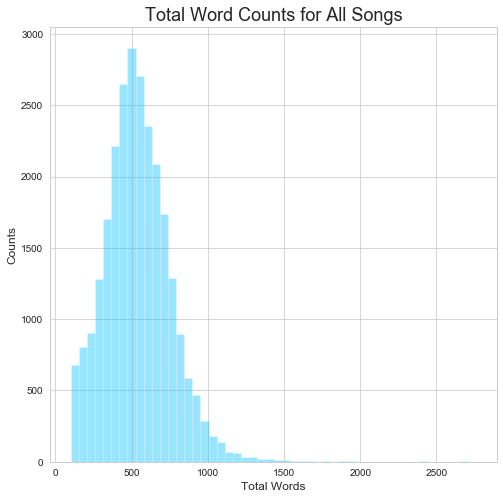

In [63]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(counts, ax=ax, kde=False, color='deepskyblue', bins=50)
ax.set_title('Total Word Counts for All Songs', size=18)
ax.set_xlabel('Total Words')
ax.set_ylabel('Counts')
fig.savefig('img/totalwordcount', transparent=True)

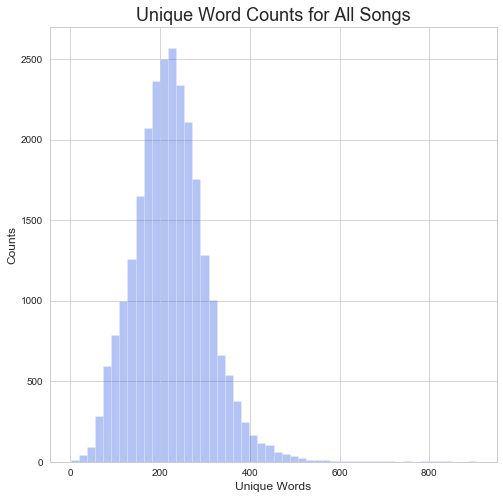

In [65]:
# Created a plot to look at the distributions of unique word counts of all 
# songs in our dataframe
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(unique_counts, ax=ax, kde=False, color='royalblue', bins=50)
ax.set_title('Unique Word Counts for All Songs', size=18)
ax.set_xlabel('Unique Words')
ax.set_ylabel('Counts')
fig.savefig('img/uniquewordcount', transparent=True)

In [98]:
# Plotted word of speech frequencies for 2 Chainz
pos_dict = dict()

In [70]:
lyrics = " ".join(df[df['Artist'] == '2 Chainz']['Lyrics'].values)
doc = nlp(lyrics)

In [99]:
for word in doc:
    if word.pos_ == 'SPACE' or word.pos_ == 'PUNCT':
        pass
    elif word.pos_ not in pos_dict:
        pos_dict[word.pos_] = 1
    else:
        pos_dict[word.pos_] += 1
sorted_pos = sorted(pos_dict.items(), key=lambda x: x[1],
                          reverse = True)

In [100]:
pos = []
count = []
for row in sorted_pos:
    pos.append(row[0])
    count.append(row[1])

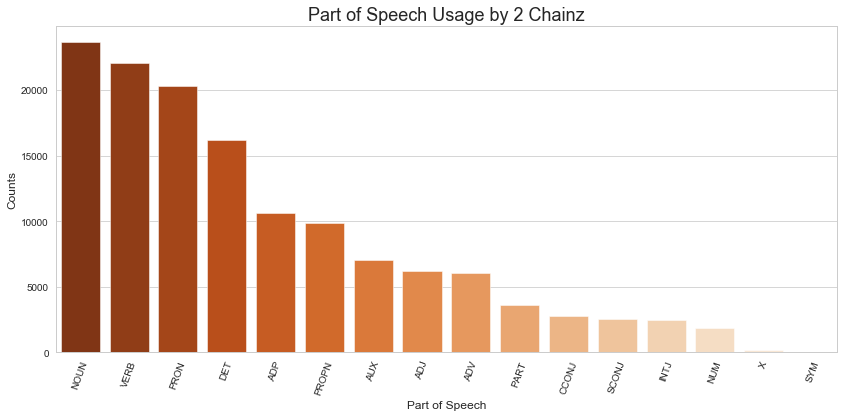

In [101]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = pos, y = count,
            palette = 'Oranges_r')
ax.set_title('Part of Speech Usage by 2 Chainz', size=18)
ax.set_xlabel('Part of Speech')
ax.set_ylabel('Counts')
for tick in ax.get_xticklabels():
    tick.set_rotation(70)
fig.savefig('img/pos_2Chainz.png', transparent=True)